In [1]:
# %matplotlib_svg
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.rcParams["font.family"] = "simsun" # 可以直接修改設定字典，設定預設字型，這樣就不需要在每次繪製文字時設定字型了
plt.rcParams['axes.unicode_minus']=False    # 當座標軸上的 負號 無法正常顯示時，需加這行 code
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)


In [18]:
import os
import sys 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../codes/")))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../codes/scpy2/")))

In [16]:
from IPython.core.magic import register_line_magic

@register_line_magic
def dot(line):
    from IPython.core.getipython import get_ipython
    from fnmatch import fnmatch

    import pydotplus as pdp
    from IPython.display import display, Image

    line = line.strip()
    data = eval(line)

    graph = pdp.graph_from_dot_data(data)
    display(Image(graph.create_png()))

## 座標變換和注解

一幅圖表中有關多種座標系以及座標轉換，了解各種座標系的含義並掌握其用法才能隨心所欲地使用 matplotlib 繪製出理想效果的圖表。

本節以圖表中的文字, 箭頭, 標記為例介面各種座標系及其轉換。

- 用兩個小數點表示 直線 和 曲線 的兩個交點。
- 對兩個交點之間、位於直線和曲線之間的面積進行了填充。
- 使用一個高為整個子圖高度、左右邊位於兩個交點的矩形表示兩個交點之間的區間。
- 在圖的左上角放置了說明文字。
- 對兩個交點和填充面積使用了帶箭頭的註釋說明。

首先，

❶ 定義了兩個函數 func1 和 func2，它們分別是計算一條直線和一條二次曲線的函數。

❷ 計算這兩個函數在區間 `(-3,3)` 上的值，並且呼叫 `plot()` 繪製成曲線圖。

❸ 為了標出兩個交點，用 find_curve_intersects() 計算兩條曲線 f1 和 f2 的交點所對應的 X 軸座標 x1 和 x2 。交點處的小數點仍然使用 `plot()` 進行繪製，這時所傳遞的 X-Y 軸的資料為單一的數值，並且以 `'o'` 為樣式進行繪圖。
> `如何計算兩條曲線的交點`
> 當兩條曲線的 Y 軸座標值 `y1` 和 `y2` 使用相同的 X 軸座標陣列 `x` 計算時，很容易計算它們的交點。首先計算兩條曲線在 Y 軸的差值 `d=y1-y2` ，然後找到符號相反的兩個連續的差值的索引 `idx` 和 `idx+1` 。計算直線 `(x[idx], d[idx])-(x[idx+1], d[idx+1])` 和 X 軸的交點就可以獲得兩條曲線交點的 X 軸座標 `xc`。如果要計算交點的 Y 軸座標，只需要呼叫 `np.interp(xc, x, y)` 對曲線進行線性內插即可。

❹ 接下來呼叫 `fill_between()` 繪製 X 軸上在兩個交點之間、Y 軸上在兩條曲線之間的面積部分，並透過 `facecolor` 和 `alpha` 參數指定填充的顏色和透明度。`fill_between()` 的呼叫參數如下：
```
fill_between(x, y1, y2=0, where=None)
```
其中，
- `x` 參數是長度為 N 的陣列
- `y1`, `y2` 參數是長度為 N 的陣列或單一數值。當 `y1` 或 `y2` 為單一數值時，它們相當於一個長度為 N、元素數值都相同的陣列。`fill_between()` 將填充 Y 軸在 `y1` 和 `y2` 之間的部分。
- `where` 參數，如果 `where` 參數為 `None`，就對陣列 `x` 中的所有元素進行填充；如果 `where` 是一個布林陣列，則只填充其中 `True` 所對應的部分。

程式中的陣列 `x` 的設定範圍為 `(-3,3)` ，由於設定了條件 `where = f1 > f2` ，因此只繪製直線在二次曲線之上的部分。

❺ 繪製 X 軸上在兩個交點之間的矩形區域；

❻ 用 `text()` 在圖表中增加說明文字；

❼ 用 `annotate()` 為圖表增加三個帶箭頭的註釋。

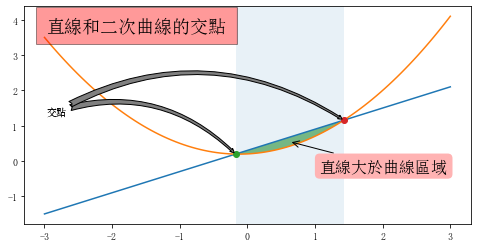

In [10]:
#%fig=為圖表加入各種注解元素
def func1(x): #❶
    return 0.6*x + 0.3

def func2(x): #❶
    return 0.4*x*x + 0.1*x + 0.2
    
def find_curve_intersects(x, y1, y2):
    d = y1 - y2
    idx = np.where(d[:-1]*d[1:]<=0)[0]  # np.where()輸出是 ndarray 實例， [0] 之後會轉成 list 實例
    x1, x2 = x[idx], x[idx+1]
    d1, d2 = d[idx], d[idx+1]
    return -d1*(x2-x1)/(d2-d1) + x1

x = np.linspace(-3,3,100) #❷
f1 = func1(x)
f2 = func2(x)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, f1)
ax.plot(x, f2)

x1, x2 = find_curve_intersects(x, f1, f2) #❸
ax.plot(x1, func1(x1), "o") 
ax.plot(x2, func1(x2), "o")

ax.fill_between(x, f1, f2, where=f1>f2, facecolor="green", alpha=0.5) #❹

from matplotlib import transforms
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between([x1, x2], 0, 1, transform=trans, alpha=0.1) #❺

a = ax.text(0.05, 0.95, u"直線和二次曲線的交點",  #❻
    transform=ax.transAxes,
    verticalalignment = "top",
    fontsize = 18,
    bbox={"facecolor":"red","alpha":0.4,"pad":10}
)

arrow = {"arrowstyle":"fancy,tail_width=0.6", 
        "facecolor":"gray", 
        "connectionstyle":"arc3,rad=-0.3"}

ax.annotate(u"交點", #❼
    xy=(x1, func1(x1)), xycoords="data",
    xytext=(0.05, 0.5), textcoords="axes fraction",
    arrowprops = arrow)

ax.annotate(u"交點", #❼
    xy=(x2, func1(x2)), xycoords="data",
    xytext=(0.05, 0.5), textcoords="axes fraction",
    arrowprops = arrow)

xm = (x1+x2)/2
ym = (func1(xm) - func2(xm))/2+func2(xm)
o = ax.annotate(u"直線大於曲線區域", #❼
    xy =(xm, ym), xycoords="data",
    xytext = (30, -30), textcoords="offset points",    
    bbox={"boxstyle":"round", "facecolor":(1.0, 0.7, 0.7), "edgecolor":"none"},
    fontsize=16,
    arrowprops={"arrowstyle":"->"}
)

### 四種座標系

在 matplotlib 所繪製的一幅圖表中，有 4 種座標系：
- `資料座標系`：它是描述 `資料空間` 中位置的座標系，例如對於上圖，它的 `資料座標系` 的範圍為 X 軸在 `(-3, 3)` 之間，Y 軸在 `(-2, 5)` 之間。
- `子圖座標系`：描述子圖中位置的座標系，子圖的左下角座標為 `(0, 0)` ，右上角座標為 `(1, 1)`。
- `圖表座標系`：一幅圖表可以包含多個子圖，並且子圖周圍都有一定的餘白，因此還需要用 `圖表座標系` 描述圖表顯示區域中的某個點，圖表的左下角座標為 `(0, 0)` ，右上角座標為 `(1, 1)`。
- `視窗座標系`：它是繪圖視窗中以像素為單位的座標系。左下角座標為 `(0, 0)` ，右上角座標為 `(width, height)` 。其中 `width` 和 `height` 分別是以像素為單位的繪圖視窗的`內寬`和`內高`，不包含標題列、工具列 以及 狀態列 等部分。

`Axes` 物件的 `transData` 屬性是`資料座標`轉換物件，`transAxes` 屬性是`子圖座標`轉換物件。`Figure` 物件的 `transFigure` 屬性是`圖表座標`轉換物件。

透過上述座標轉換物件的 `transform()` 方法，可以將此座標系下的座標轉為`視窗座標系`中的座標。下面的程式計算資料座標系中的座標點`(-3, -2)` 和 `(3, 5)` 在繪圖視窗中的座標：

In [11]:
print( type(ax.transData) )
ax.transData.transform([(-3,-2), (3,5)])

<class 'matplotlib.transforms.CompositeGenericTransform'>


array([[ 92.29090909,  28.23428571],
       [498.10909091, 275.32519481]])

下面的程式計算子圖座標系中的座標點 `(0,0)` 和 `(1,1)` 在繪圖視窗中的位置，獲得的結果和上面的相同。即子圖的左上角座標 `(0,0)` 和資料座標系中的座標`(-3,-2)` 在螢幕上是一個點。

(2022-01-24) 兩者的 視窗座標 並沒有一樣

In [12]:
ax.transAxes.transform([(0,0), (1,1)])

array([[ 72.  ,  36.  ],
       [518.4 , 253.44]])

最後計算圖表座標系中座標點 `(0,0)` 和 `(1,1)` 在繪圖視窗中的位置，可以看出繪圖區域的寬為 640 個像素，高為 320 個像素。

In [13]:
fig.transFigure.transform([(0,0), (1,1)])

array([[  0.,   0.],
       [576., 288.]])

透過座標轉換物件的 `inverted()` 方法，可以獲得它的逆轉換件。例如下面的程式計算繪圖視窗中的座標點 `(320, 160)` 在資料座標系中的座標，結果為 `(-0.09677419, 1.5)`:

In [14]:
inv = ax.transData.inverted()
print( type(inv) )
inv.transform((320, 160))

<class 'matplotlib.transforms.CompositeGenericTransform'>


array([0.36666667, 1.73287712])

觀察程式所繪的圖表，子圖的上下餘白相同，而左側餘白略大於右側餘白，因此繪圖區域的中心點 `(320, 160)` 並不是資料區域的中心點 `(0, 1.5)`。

當呼叫 `set_xlim()` 修改子圖所顯示的 X 軸範圍之後，它的資料座標轉換物件也同時發生了變化：

In [15]:
print( ax.set_xlim(-3, 2) )# 設定X軸的範圍為-3到2
print( ax.transData.transform((3, 5)) )# 資料座標變換物件已經發生了變化

(-3.0, 2.0)
[607.68       275.32519481]


矩形區間使用 `fill_between()` 繪製。由於所繪製矩形的左右兩邊要始終經過兩個交點，因此矩形的 X 軸座標必須使用資料座標系中的座標： `x1` 和 `x2` 。而由於矩形的高度始終填滿整個子圖的高度，因此矩形的 Y 軸座標必須是子圖座標系中的座標： 0 和 1。

> **TIP**

> 使用 `axvspan()` 和 `axhspan()` 可以快速繪制垂直方向和水平方向上的區間。

程式中，使用 `blended_transform_factory()` 建立這種混合座標系。它的兩個參數都是座標轉換物件，它從第一個參數獲得 X 軸的座標轉換，從第二個參數獲得 Y 軸的座標轉換。因此它所傳回的座標轉換物件 `trans` 的 X 軸使用資料座標系，而 Y 軸使用子圖座標系。程式中，將混合座標轉換物件 `trans` 傳遞給 `fill_between()` 的 `transform` 參數，這樣所繪製的填充區域就能始終保持左右邊透過兩個交點，而上下面位於子圖邊框之上。

### 座標變換的管線

從一個座標系轉換到另一個座標系，中間需要經過幾個步驟。而且資料座標系不一定是笛卡爾座標系，它可能是極座標系或對數座標系。因此座標系的轉換並不是簡單的二維仿射轉換(2D Affine Transformation)。讓我們從最簡單的圖表座標轉換物件 `transFigure` 開始，介紹 matplotlib 的座標轉換是如何進行的。

透過本書提供的 GraphvizMPLTransform 可以將座標轉換物件顯示為關係圖，圖顯示了 `fig.transFigure` 的內部結構。

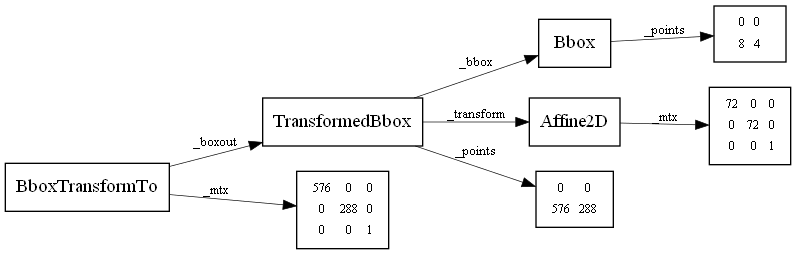

In [19]:
#%fig=圖表座標變換物件的內定結構
from scpy2.common import GraphvizMPLTransform
%dot GraphvizMPLTransform.graphviz(fig.transFigure)

這個座標轉換物件的內容有些複雜，它是一個 `BboxTransformTo` 物件，其中包含一個 `TransformedBbox` 物件，而 `TransformedBbox` 物件又包含一個 `Bbox` 物件和一個 `Affine2D` 物件：
- `Bbox`：定義一個矩形區域——`[[x0, y0], [x1, y1]]` 。本例中，矩形的兩個頂點座標分別為 `(0,0)` 和 `(8,4)` ，它是視窗的英吋大小，透過 `figsize` 參數傳遞給 `figure()`。
- `Affine2D`：二維仿射轉換物件，它是一個矩陣，透過它和齊次向量相乘獲得轉換之後的座標。由於矩陣中只有對角線上的值不為 0，因此該仿射轉換只進行縮放轉換。它將座標 `(x, y)` 轉為 `(80*x, 80*y)`。
> `仿射轉換`
> 二維空間的仿射轉換矩陣的大小為 `3x3` ，為了進行仿射轉換需要使用齊次座標，即用 3D 向量 `(x, y, 1)` 表示二維平面上的點 `(x, y)`。仿射轉換就是仿射矩陣和向量的乘積。由於轉換矩陣最下一行的數值始終是`(0, 0, 1)` ，因此有時也將它寫成 `2x3` 的矩陣形式。

- `TransformedBbox`：將矩形區域透過仿射轉換之後，獲得一個新的矩形區域。實例中，所得到的矩形區域的兩個頂點為 `(0, 0)` 和 `(640, 320)` 。為了避免重複運算，它的 `_points` 屬性快取了這兩個頂點的座標。它正好是以像素點為單位的視窗大小，因此仿射轉換矩陣中的數值 `80` 實際上是 `Figure物件` 的 `dpi屬性`。
- `BboxTransformTo`：它是一個從單位矩形區域轉換到指定的矩形區域的轉換。在本例中，它是一個將矩形區域 `(0, 0)~(1, 1)` 轉換到矩形區域 `(0, 0)~(640, 320)` 的座標轉換物件，因此它能將座標從圖表座標系轉為視窗座標系中的座標。其 `_max屬性`快取了該轉換矩陣。

`fig.transFigure` 中的仿防轉換物件可以透過 `fig.dpi_scale_trans` 獲得：

In [20]:
fig.dpi_scale_trans == fig.transFigure._boxout._transform

True

接下來檢視子圖座標轉換物件的內容：

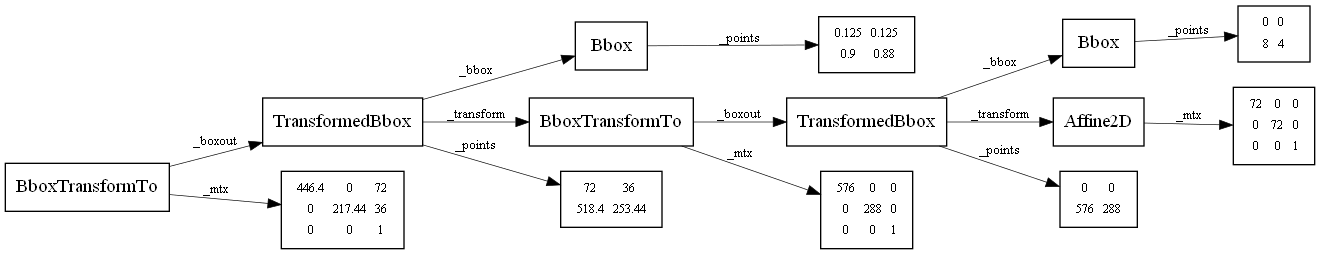

In [21]:
#%fig=子圖座標變換物件的內定結構
%dot GraphvizMPLTransform.graphviz(ax.transAxes)

`ax.transAxes` 是一個 `BboxTransformTo` 物件，因此它也將 `(0, 0)-(1, 1)` 區域轉為另一個區域。而此區域是一個 `TransformedBbox` 物件，它是將矩形區域 `(0.125, 0.1)-(0.9, 0.9)` 透過 `fig.transFigure` 轉換之後的區域。因此在 `transAxes` 物件內部使用了 `transFigure` 轉換：

In [22]:
ax.transAxes._boxout._transform == fig.transFigure

True

而此轉換中的矩形區域 `(0.125, 0.1)-(0.9, 0.9)` 是子圖在圖表座標系中的位置：

In [23]:
ax.get_position()

Bbox([[0.125, 0.125], [0.9, 0.88]])

子圖在視窗座標系中的矩形區域為：

In [24]:
ax.transAxes._boxout.bounds

(72.0, 36.0, 446.4, 217.44)

因此 `ax.transAxes` 實際上是一個將矩形區域 `(0, 0)-(1, 1)` 轉換到矩形區域 `(80.0, 32)-(496.0, 256.0)` 的座標轉換物件。

最後我們觀察資料座標系的轉換物件 `ax.transData`(內部結構參見下圖)。它由 `ax.transScale`, `ax.transLimits`, `ax.transAxes` 共同組成，因此先看看 `ax.transLimits`, `ax.transScale`的內容。`transLimits` 是一個 `BboxTransformFrom`物件，它是一個將指定的矩形區域轉為 `(0, 0)-(1, 1)` 矩形區域的轉換物件。

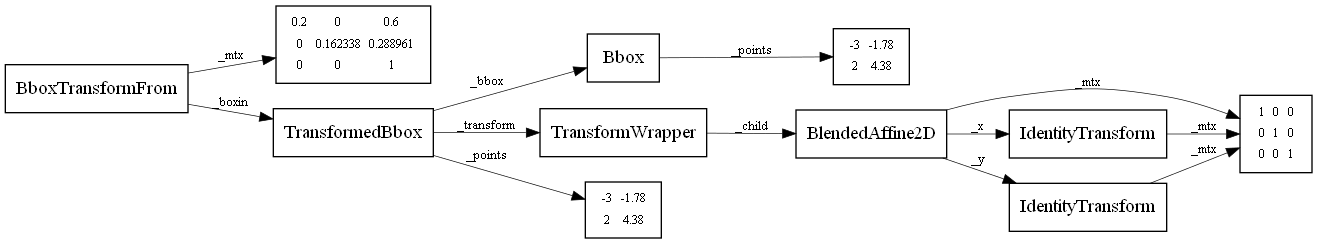

In [25]:
#%fig=資料座標變換物件的內定結構
%dot GraphvizMPLTransform.graphviz(ax.transLimits)

而 `transLimits` 的源矩形區域為一個 `TransformedBbox` 物件，它是一個將矩形區域 `(-3, -2)-(2, 5)` 透過座標轉換之後的矩形區域。而此處的轉換由 `TransformWrapper`物件定義，在上圖中它是一個恆等轉換。因此 `transLimits` 的最後效果就是將矩形區域`(-3, -2)-(2,5)` 轉為矩形區域 `(0,0)-(1,1)`：

In [26]:
print( ax.transLimits.transform((-3, -2)) )
print( ax.transLimits.transform((2, 5)) )

[ 0.         -0.03571429]
[1.         1.10064935]


而矩形區域`(-3,-2)-(2,5)` 由 X 軸和 Y 軸的顯示範圍決定：

In [27]:
print( ax.get_xlim() )# 獲得X軸的顯示範圍
print( ax.get_ylim() )# 獲得Y軸的顯示範圍

(-3.0, 2.0)
(-1.7799999999999998, 4.380000000000001)


由於 `transLimits` 將資料座標系的顯示範圍轉為單位矩形，而 `transAxes` 將單位距形轉為以像素為單位的視窗矩形範圍，因此這兩個轉換的綜合效果就是將資料座標轉為視窗座標。可以用 `"+"` 號將兩個轉換連接起來建立一個新的轉換物件，例如 `ax.transLimits + ax.transAxes` 表示先進行 `ax.transLimits` 轉換，然後進行 `ax.transAxes` 轉換，轉換物件就像管線上生產產品一樣，一步一步地對座標點進行轉換。下面的程式比較它和 `ax.transData` 的轉換結果：

In [28]:
t = ax.transLimits + ax.transAxes
print( t.transform((0,0)) )
print( ax.transData.transform((0,0)) )

[339.84        98.83168831]
[339.84        98.83168831]


`transData` 中還包含一個 `transScale` 轉換，即 `transData = transScale + transLimits + transAxes` 。本例中 `transScale` 是一個恆等轉換，因此 `ax.transLimits + ax.transAxes` 和 `ax.transData`的轉換效果一樣：

In [29]:
ax.transScale

當使用 `semilogx()`, `semilogy()`, `loglog()` 等繪圖函數繪製對數座標軸的圖表時，或使用 `Axes` 的 `set_xscale()`, `set_yscale()` 等方法將座標軸設定為對數座標時，`transScale` 就不再是恆等轉換了，其內部結構如下圖所示。

> **WARNING**

> 由於本例中的X軸的取值範圍是`(-3,3)`，因此若果將X軸改為對數座標，並且重新繪圖，會產生很多錯誤訊息。

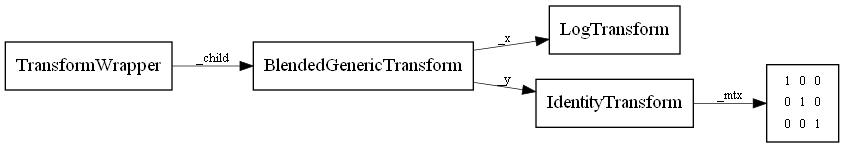

In [30]:
#%fig=X軸為對數座標時的transScale物件的內定結構
ax.set_xscale("log") # 將X軸改為對數座標
%dot GraphvizMPLTransform.graphviz(ax.transScale)
ax.set_xscale("linear") # 將X軸改為線性座標

### 製作陰影效果

下面用上節介紹的座標轉換繪製帶陰影效果的曲線。完整程式如下，效果如圖所示：

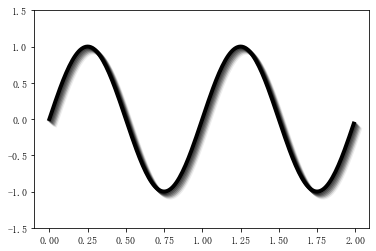

In [31]:
#%fig=使用座標變換繪制的帶陰影的曲線
fig, ax = plt.subplots()
x = np.arange(0., 2., 0.01)
y = np.sin(2*np.pi*x)

N = 7 # 陰影的條數
for i in range(N, 0, -1):
    offset = transforms.ScaledTranslation(i, -i, transforms.IdentityTransform()) #❶
    shadow_trans = plt.gca().transData + offset #❷
    ax.plot(x,y,linewidth=4,color="black", 
        transform=shadow_trans,  #❸
        alpha=(N-i)/2.0/N)
    
ax.plot(x,y,linewidth=4,color='black')    
ax.set_ylim((-1.5, 1.5));

首先使用循環繪製 N 條透明度和偏移量逐漸層化的曲線，然後繪製實際的曲線，以實現陰影效果。

❶ `offset` 是一個 `ScaledTranslation` 物件，它的前兩個參數決定了 X 軸和 Y 軸的偏移量，而第三個參數是一個座標轉換物件，經過它轉換之後，再進行偏移轉換。由於程式中的第三個參數是一個恆等轉換，因此 `offset` 實際上是一個單純的偏移轉換：對 X 軸座標增加 i，對 Y 軸座標減少 i。

下面檢視 i 為 1 時的 `offset`：

In [32]:
offset.transform((0,0)) # 將(0,0)變換為(1,-1)

array([ 1., -1.])

❷ 陰影曲線的座標轉換由 `shadow_trans` 完成，它由資料座標轉換物件 `transData` 和 `offset` 組成。


In [33]:
print( ax.transData.transform((0,0)) )# 對(0,0)進行資料座標變換
print( shadow_trans.transform((0,0)) )# 對(0,0)進行資料座標變換和偏移變換

[ 69.21818182 144.72      ]
[ 70.21818182 143.72      ]



❸ 最後透過參數 `transform` 將 `shadow_trans` 傳遞給 `plot()` 繪圖。由於 `shadow_trans` 是在完成資料座標到視窗座標的轉換之後，再進行偏移轉換，因此無論目前的縮放比例如何，陰影效果將始終保持一致。

### 加入注解

在 pyplot 模組中提供了兩個繪製文字的函數：`text()` 和 `figtext()`。它們分別呼叫目前 `Axes` 物件和目前 `Figure` 物件的 `text()` 方法進行繪圖。`text()` 預設在資料座標系中增加文字，而 `figtext()` 則預設在圖表座標系中增加文字。可以透過 `transform` 參數改變文字所在的座標系，下面的程式示範了在資料座標系、子圖座標系以及圖表座標系中增加文字：

Text(0.1, 0.92, '圖表座標系中的文字')

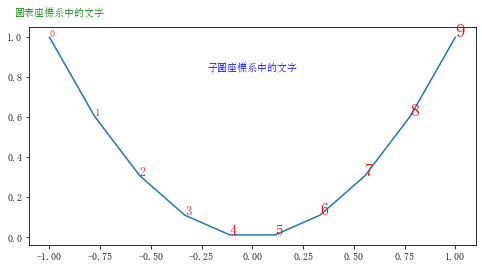

In [34]:
#%fig=三個座標系中的文字
x = np.linspace(-1,1,10)
y = x**2

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x,y)

for i, (_x, _y) in enumerate(zip(x, y)):
    ax.text(_x, _y, str(i), color="red", fontsize=i+10) #❶

ax.text(0.5, 0.8, u"子圖座標系中的文字", color="blue", ha="center", 
    transform=ax.transAxes) #❷
    
plt.figtext(0.1, 0.92, u"圖表座標系中的文字", color="green") #❸;

❶ 由於沒有設定 `transform` 參數，`text()` 預設在資料座標系中建立文字，這裡透過 `fontsize` 參數修改文字的大小。

❷ 透過 `transform` 參數將文字的座標轉換改為 `ax.transAxes` ，因此文字在子圖座標系中。`ha` 參數為 `center` 表示座標點 `(0.5, 0.8)` 在水平方在上是文字的中心，`ha` 是 `horizontalalignment` 的縮寫，其含義是水平對齊。

❸ 呼叫 `figtext()` 在圖表座標系中增加文字。

程式的輸出如上圖所示。請使用縮放和平移工具改變子圖的顯示範圍，你會發現資料座標系中的文字將跟隨曲線變動，而其他兩個座標系中的文字位置不變。點擊繪圖視窗工具列中的倒數第二個圖示按鈕，開啟 "Subplot Configuration Tool" 對話方塊，調節 top, right, bottom, left 等參數，你會發現子圖座標系中的文字也會跟著改變位置，水平方向上它和子圖的中心始終保持一致。而圖表座標系中文字的位置，只有在改變視窗大小時才會發生變化。

繪製文字的函數還有許多關鍵字參數用於設定文字、外框的樣式，可參考 matplotlib 的使用手冊。

透過 pyplot 模組的 `annotate()` 繪製帶箭頭的註釋文字，其呼叫參數如下：
```
annotate(s, xy, xytest=None, xycoords='data', textcoords='data', arrowprops=None, ...)
```
其中
- `s` 參數是註釋文字
- `xy` 是箭頭所指處的座標
- `xytext` 是註釋文字所在的座標
- `xycoords`, `textcoords` 分別指定箭頭座標和註釋文字座標的座標轉換方式。

帶箭頭的註釋需要指定兩個座標：箭頭所指處的座標和註釋文字所在的座標。而這兩個座標可以使用不同的座標轉換。參數 `xycoords` 和 `textcoords` 都是字串，它們可以有 表4-5 所示的幾種選項:

表4-5 屬性值與對應的座標轉換方式
|屬性值 |座標轉換方式 |
|-------|-----------|
|figure points |以點為單位，相對於圖表左下角的座標 |
|figure pixels |以像素為單位，相對於圖表左下角的座標 |
|figure fraction |圖表座標系中的座標 |
|axes points |以點為單位，相對於子圖左下角的座標 |
|axes pixels |以像素為單位，相對於子圖左下角的座標 |
|axes fraction |子圖座標系中的座標 |
|data |資料座標系中的座標 |
|offset points |以點為單位，相對於點 xy 的座標 |
|polar |資料座標系中的極座標 |

其中 `figure fraction`, `axes fraction`, `data` 分別表示使用圖表座標系, 子圖座標系, 資料座標系中的座標轉換物件。
由於圖表和子圖座標系都是正規化之後的座標，使用起來不太方便，因此對於圖表和子圖還分別提供了以點為單位和以象素為單位的座標轉換方式。點和像素的單位類似，但是它不會隨著圖表的 `dpi` 屬性值而發生變化，它始終以每英吋  72 個點進行計算。

上述幾種座標轉換都以固定的點為原點進行轉換，有時我們希望以距離箭頭的偏移量指定文字的座標，這時可以使用 `offset points` 選項。

在圖4-11中，所有註釋的箭頭座標都採用 `data` ，因此無論如何放大或平移繪圖區域，箭頭始終指向資料座標系中的固定點。而註釋文字「交點」的座標轉換方式採用 `axes fraction`，因此「交點」始終保持在子圖中的固定位置。而「直線大於曲線區域」註釋文字的座標採用 `offset points` 轉換，因此文字和箭頭的相對位置始終保持不變。

最後，`arrowprops` 參數是一個描述箭頭樣式的字典。關於註釋樣式的詳細設定請參考 matplotlib 相關文件。